![](https://viterbischool.usc.edu/wp-content/uploads/2020/07/hate-1200x600-1.jpg)

<span style="color: white; background-color: red; padding: 7px 15px; border-radius: 8px; font-size: 30px; font-weight: bold;">HateSpeech Slayer: AI With a Zero-Tolerance Policy ⚔️</span>




# Youtube Video Link -->>> https://youtu.be/fsSHQRZSdmU

# Step 1: Load Necessary Libraries

In [8]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, StackingClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

# Step 2: Load and Explore Data

In [9]:
train_df = pd.read_csv('/kaggle/input/twitter-sentiment-analysis-hatred-speech/train.csv')



In [10]:
train_df.head()


,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [14]:
# Checking for null values
train_df.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

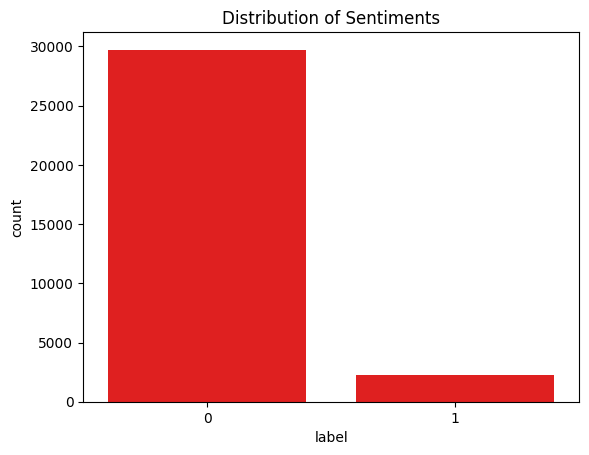

In [15]:
# Plot sentiment distribution
sns.countplot(x='label', data=train_df, color='red')
plt.title('Distribution of Sentiments')
plt.show()


# Step 3: Data Cleaning & Preprocessing


In [16]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [17]:
def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # Remove links
    text = re.sub(r'\@\w+|\#','', text)  # Remove mentions and hashtags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

In [18]:
train_df['clean_text'] = train_df['tweet'].apply(clean_text)
train_df.head()

,id,label,tweet,clean_text
0,1,0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drags kids dysfun...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks lyft credit cant use cause dont offer w...
2,3,0,bihday your majesty,bihday majesty
3,4,0,#model i love u take with u all the time in ...,model love u take u time urð ðððð ððð
4,5,0,factsguide: society now #motivation,factsguide society motivation


# Step 4: Convert Text into Features

In [19]:
# Convert cleaned text into TF-IDF feature vectors with a maximum of 8000 features  
vectorizer = TfidfVectorizer(max_features=8000)
X = vectorizer.fit_transform(train_df['clean_text'])
y = train_df['label']

# Step 5: Train-Test Split


In [20]:
# Split the data into training and testing sets while maintaining label distribution  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Step 6: Apply SMOTE

In [21]:
# Display class distribution before applying SMOTE  
print("Before SMOTE:\n", y_train.value_counts())


Before SMOTE:
 label
0    23775
1     1794
Name: count, dtype: int64


In [22]:
# Tomek Links (Cleaning the Majority Class)
# - It finds majority class samples (positive reviews) that are very close to minority ones and removes them.
# - This makes the boundary between classes clearer, so the model doesn’t get confused.

# Why Use SMOTE + Tomek Instead of Just SMOTE?
# - SMOTE alone adds new minority samples but doesn’t clean the noise.
# - SMOTE + Tomek not only balances the data but also removes unnecessary majority samples, 
#   making learning more efficient.

from imblearn.combine import SMOTETomek

smote_tomek = SMOTETomek(random_state=42)
X_train_smote, y_train_smote = smote_tomek.fit_resample(X_train, y_train)


In [23]:
# Display class distribution after applying SMOTE  
print("After SMOTE:\n", y_train_smote.value_counts())


After SMOTE:
 label
0    23775
1    23775
Name: count, dtype: int64


# Step 7: Models Building

<span style="color: white; background-color: blue; padding: 10px 15px; border-radius: 4px; font-size: 22px; font-weight: bold;">📌 Logistic Regression Model</span>

Logistic Regression Accuracy: 0.8995776630689817
              precision    recall  f1-score   support

           0       0.98      0.91      0.94      5945
           1       0.39      0.81      0.53       448

    accuracy                           0.90      6393
   macro avg       0.69      0.86      0.74      6393
weighted avg       0.94      0.90      0.91      6393



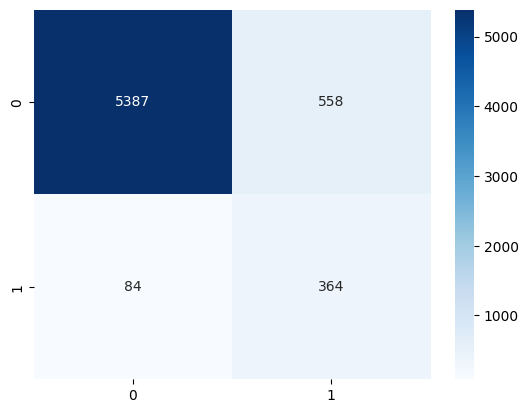

In [24]:
# Train a Logistic Regression model and evaluate its performance  
log_model = LogisticRegression()
log_model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set  
y_pred_log = log_model.predict(X_test)

# Print accuracy and classification report  
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

# Plot confusion matrix as a heatmap  
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt="d", cmap="Blues")
plt.show()


<span style="color: white; background-color: blue; padding: 10px 15px; border-radius: 4px; font-size: 22px; font-weight: bold;">📌 Vector Machine (SVM) Model</span>

SVM Accuracy: 0.9569842014703582
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      5945
           1       0.80      0.52      0.63       448

    accuracy                           0.96      6393
   macro avg       0.88      0.75      0.80      6393
weighted avg       0.95      0.96      0.95      6393



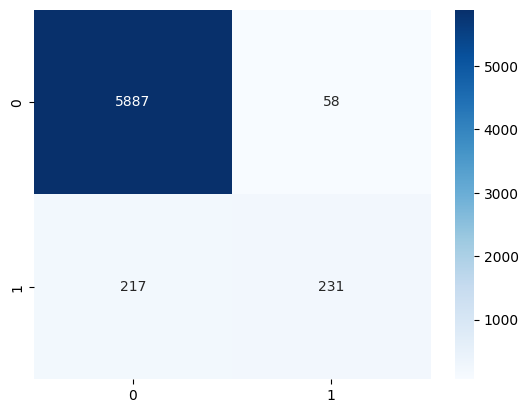

In [25]:
# Train an SVM model and evaluate its performance  
svm_model = SVC()
svm_model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set  
y_pred_svm = svm_model.predict(X_test)

# Print accuracy and classification report  
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

# Plot confusion matrix as a heatmap  
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt="d", cmap="Blues")
plt.show()


<span style="color: white; background-color: blue; padding: 10px 15px; border-radius: 4px; font-size: 22px; font-weight: bold;">📌 Random Forest Model</span>

Random Forest Accuracy: 0.9493195682778038
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5945
           1       0.63      0.67      0.65       448

    accuracy                           0.95      6393
   macro avg       0.80      0.82      0.81      6393
weighted avg       0.95      0.95      0.95      6393



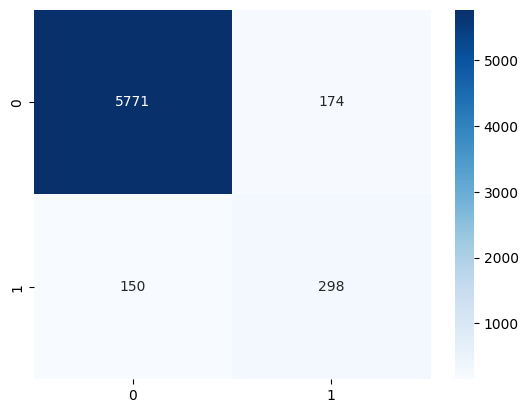

In [26]:
# Train a Random Forest model and evaluate its performance  
rf_model = RandomForestClassifier()
rf_model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set  
y_pred_rf = rf_model.predict(X_test)

# Print accuracy and classification report  
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Plot confusion matrix as a heatmap  
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues")
plt.show()


<span style="color: white; background-color: blue; padding: 10px 15px; border-radius: 4px; font-size: 22px; font-weight: bold;">📌 CatBoost Model</span>

CatBoost Accuracy: 0.9468168309088065
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      5945
           1       0.60      0.73      0.66       448

    accuracy                           0.95      6393
   macro avg       0.79      0.85      0.81      6393
weighted avg       0.95      0.95      0.95      6393



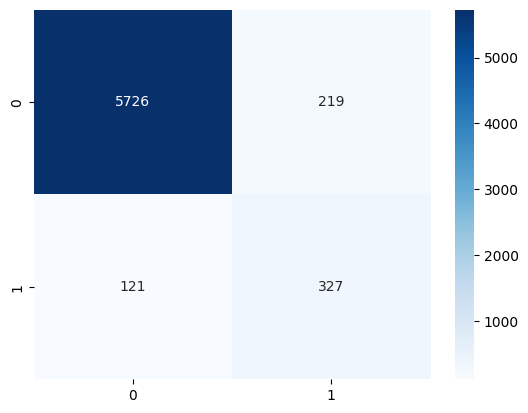

In [27]:
# Train a CatBoost model and evaluate its performance  
cat_model = CatBoostClassifier(verbose=0)
cat_model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set  
y_pred_cat = cat_model.predict(X_test)

# Print accuracy and classification report  
print("CatBoost Accuracy:", accuracy_score(y_test, y_pred_cat))
print(classification_report(y_test, y_pred_cat))

# Plot confusion matrix as a heatmap  
sns.heatmap(confusion_matrix(y_test, y_pred_cat), annot=True, fmt="d", cmap="Blues")
plt.show()


<span style="color: white; background-color: blue; padding: 10px 15px; border-radius: 4px; font-size: 22px; font-weight: bold;">📌 Naïve Bayes Model</span>

Naïve Bayes Accuracy: 0.9180353511653371
              precision    recall  f1-score   support

           0       0.98      0.93      0.95      5945
           1       0.45      0.80      0.58       448

    accuracy                           0.92      6393
   macro avg       0.72      0.86      0.77      6393
weighted avg       0.95      0.92      0.93      6393



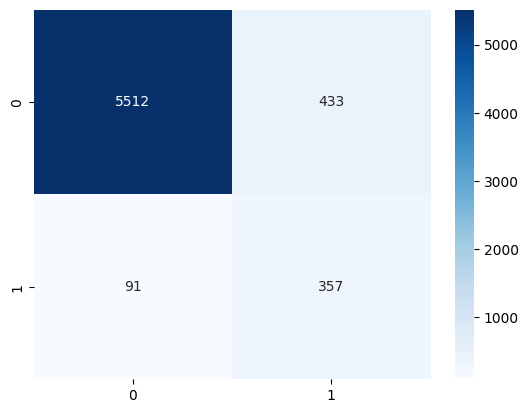

In [28]:
# Train a Naïve Bayes model and evaluate its performance  
nb_model = MultinomialNB()
nb_model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set  
y_pred_nb = nb_model.predict(X_test)

# Print accuracy and classification report  
print("Naïve Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

# Plot confusion matrix as a heatmap  
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt="d", cmap="Blues")
plt.show()


<span style="color: white; background-color: blue; padding: 10px 15px; border-radius: 4px; font-size: 22px; font-weight: bold;">📌 Bagging Classifier Model</span>

Bagging Classifier Accuracy: 0.9396214609729392
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      5945
           1       0.56      0.68      0.61       448

    accuracy                           0.94      6393
   macro avg       0.77      0.82      0.79      6393
weighted avg       0.95      0.94      0.94      6393



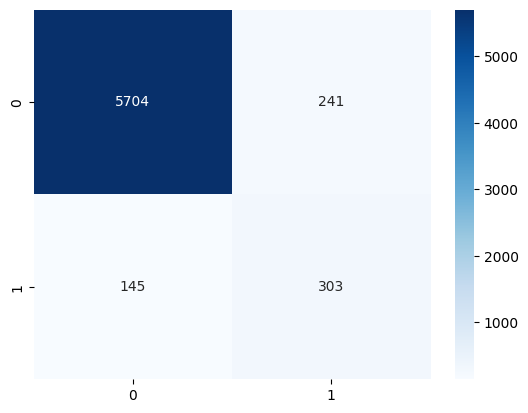

In [29]:
# Train a Bagging Classifier using Decision Trees as base estimators and evaluate its performance  
bagging_model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10)
bagging_model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set  
y_pred_bagging = bagging_model.predict(X_test)

# Print accuracy and classification report  
print("Bagging Classifier Accuracy:", accuracy_score(y_test, y_pred_bagging))
print(classification_report(y_test, y_pred_bagging))

# Plot confusion matrix as a heatmap  
sns.heatmap(confusion_matrix(y_test, y_pred_bagging), annot=True, fmt="d", cmap="Blues")
plt.show()


<span style="color: white; background-color: blue; padding: 10px 15px; border-radius: 4px; font-size: 22px; font-weight: bold;">📌 Stacking Classifier Model</span>

Stacking Classifier Accuracy: 0.9549507273580479
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      5945
           1       0.70      0.62      0.66       448

    accuracy                           0.95      6393
   macro avg       0.84      0.80      0.82      6393
weighted avg       0.95      0.95      0.95      6393



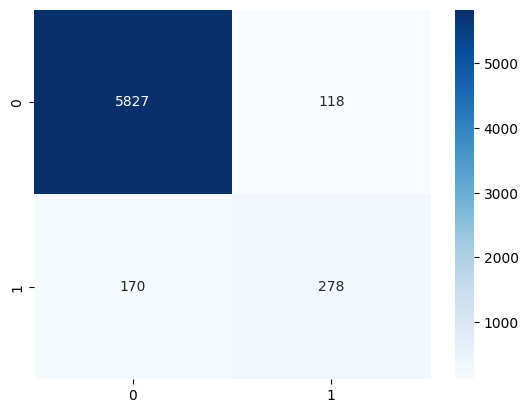

In [30]:
# Train a Stacking Classifier with Random Forest and XGBoost as base models and Logistic Regression as the final estimator  
stacking_model = StackingClassifier(
    estimators=[
        ("rf", RandomForestClassifier()), 
        ("xgb", XGBClassifier())
    ],
    final_estimator=LogisticRegression()
)

# Train the stacking model  
stacking_model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set  
y_pred_stacking = stacking_model.predict(X_test)

# Print accuracy and classification report  
print("Stacking Classifier Accuracy:", accuracy_score(y_test, y_pred_stacking))
print(classification_report(y_test, y_pred_stacking))

# Plot confusion matrix as a heatmap  
sns.heatmap(confusion_matrix(y_test, y_pred_stacking), annot=True, fmt="d", cmap="Blues")
plt.show()


# Final Step: Model Comparison


In [31]:
# Store model names and their corresponding accuracy scores for comparison  
models = ["Logistic Regression", "SVM", "Random Forest", "CatBoost", "Naïve Bayes", "Bagging", "Stacking"]
accuracies = [
    accuracy_score(y_test, y_pred_log), 
    accuracy_score(y_test, y_pred_svm),
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_cat),
    accuracy_score(y_test, y_pred_nb), 
    accuracy_score(y_test, y_pred_bagging),
    accuracy_score(y_test, y_pred_stacking)
]


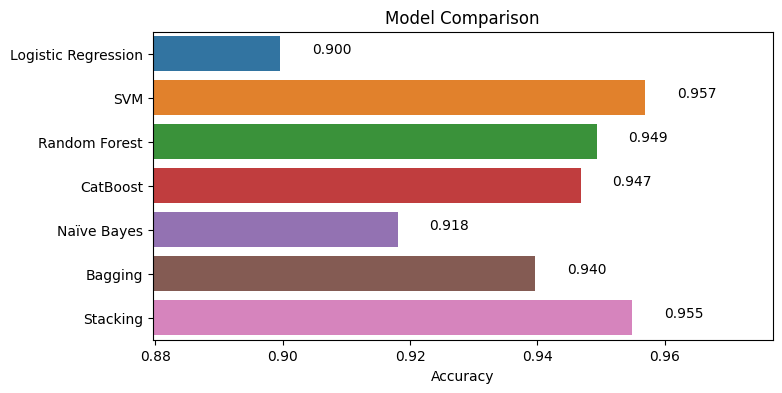

In [32]:
plt.figure(figsize=(8, 4))
sns.barplot(y=models, x=accuracies, orient='h')
plt.xlabel("Accuracy")
plt.title("Model Comparison")

for index, value in enumerate(accuracies):
    plt.text(value + 0.005, index, f"{value:.3f}")  # Adding labels

plt.xlim(min(accuracies) - 0.02, max(accuracies) + 0.02)  # Adjust limits for visibility
plt.show()

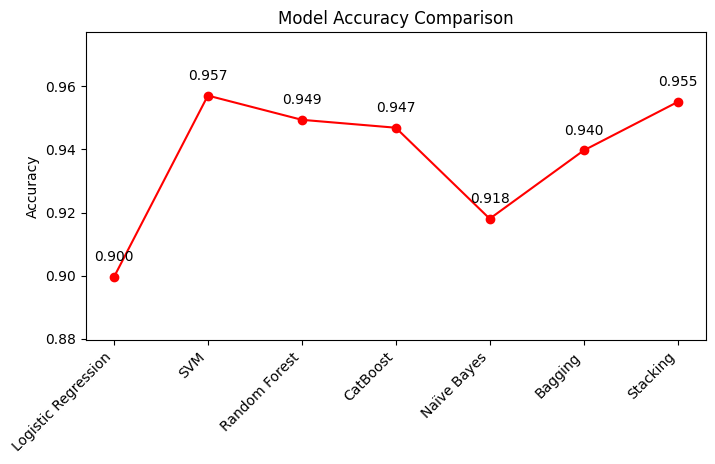

In [33]:
plt.figure(figsize=(8, 4))
plt.plot(models, accuracies, marker='o', linestyle='-', color='r')
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=45, ha='right')

for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.005, f"{acc:.3f}", ha='center')

plt.ylim(min(accuracies) - 0.02, max(accuracies) + 0.02)  # Adjust y-axis range
plt.show()


# Try Your model

In [35]:
# Sample text to predict
test_text = "i hate you"

# Preprocess the text
cleaned_text = clean_text(test_text)  

# Convert text into feature vector using the same vectorizer
z = vectorizer.transform([cleaned_text])  

# Predict using the trained stacking model
y_pred_stacking = stacking_model.predict(z)

print("Prediction:", y_pred_stacking)



Prediction: [1]


# Saving The Trained Model and TF-IDF

In [36]:
import joblib

# Save the trained SVM model and the vectorizer
#joblib.dump(svm_model, "svm_model.pkl")
joblib.dump(stacking_model, "stacking_model.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")


['tfidf_vectorizer.pkl']